# Question 1: Python Basics and Data Manipulation

Objective: \
Demonstrate basic Python skills and data manipulation using Pandas.

Task: \
Load a given CSV file containing metal prices into a Pandas DataFrame.
Filter the data to include only 'Copper' and 'Zinc' for the year 2021.
Calculate the average price per month for each metal and plot it.

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = f'{os.pardir}/data/MarketData.csv'

In [2]:
# Load the data 
raw_df = pd.read_csv(data_path)
raw_df

,Start Date,01/01/2010,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,End Date,01/01/2023,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,LME COPPER 3MO ($),LME ALUMINUM 3MO ($),LME ZINC 3MO ($),LME LEAD 3MO ($),LME TIN 3MO ($),Generic 1st 'CL' Future
3,NaN,LMCADS03 Comdty,LMAHDS03 Comdty,LMZSDS03 Comdty,LMPBDS03 Comdty,LMSNDS03 Comdty,CL1 Comdty
4,NaN,Settlement Price,Settlement Price,Settlement Price,Settlement Price,Settlement Price,Settlement Price
...,...,...,...,...,...,...,...
3392,26/12/2022,8349.5,2389.5,2965,2273.5,23934,79.56
3393,27/12/2022,8349.5,2389.5,2965,2273.5,23934,79.53
3394,28/12/2022,8443,2381,3005.5,2218,24734,78.96
3395,29/12/2022,8418,2405,2984.5,2272.5,24915,78.4


In [3]:
# Select only Dates, Copper, and Zinc columns, the first 6 rows are other information
df = raw_df.iloc[6:, [0,1,3]].copy()
df.columns = ['Dates', 'Copper', 'Zinc']
# Ensure the data types are correct
df['Dates'] = pd.to_datetime(df['Dates'], format='%d/%m/%Y')
df['Copper'] = pd.to_numeric(df['Copper'], errors='coerce')
df['Zinc'] = pd.to_numeric(df['Zinc'], errors='coerce')
# Select only 2021
df = df[df['Dates'].dt.year == 2021]
# Check there are no NaN values
print(df.isna().sum())
df

Dates     0
Copper    0
Zinc      0
dtype: int64


,Dates,Copper,Zinc
2876,2021-01-01,7766.0,2751.0
2877,2021-01-04,7860.5,2792.0
2878,2021-01-05,8002.0,2813.0
2879,2021-01-06,8037.5,2860.0
2880,2021-01-07,8179.0,2888.0
...,...,...,...
3132,2021-12-27,9568.0,3519.0
3133,2021-12-28,9568.0,3519.0
3134,2021-12-29,9680.5,3513.0
3135,2021-12-30,9691.5,3532.5


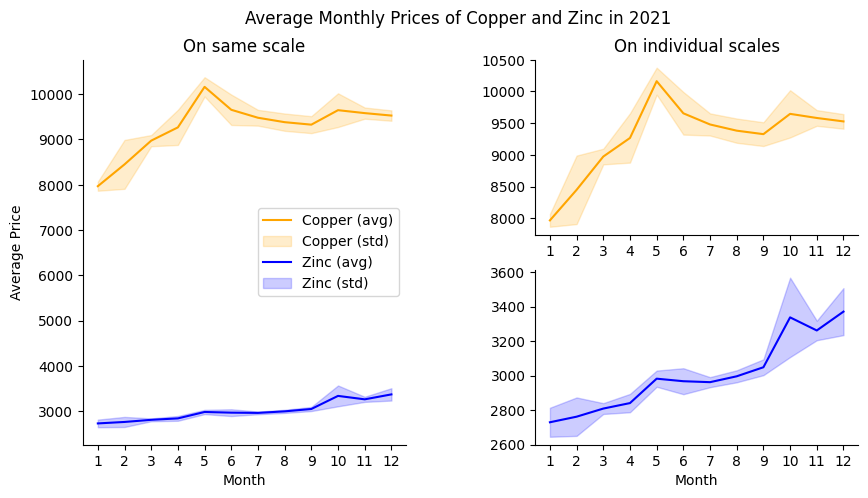

In [4]:
# Group by Year and Month

monthly_avg = df.groupby([df['Dates'].dt.month])[['Copper', 'Zinc']].mean()
monthly_avg.index.names = ['Month']
monthly_stds = df.groupby([df['Dates'].dt.month])[['Copper', 'Zinc']].std()
monthly_stds.index.names = ['Month']

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Average Monthly Prices of Copper and Zinc in 2021')
grid = plt.GridSpec(nrows=2, ncols=2, figure=fig, wspace=0.4)

# Plot the averages together

ax = fig.add_subplot(grid[0:2, 0])
ax.set_title('On same scale')
ax.plot(monthly_avg.index, monthly_avg['Copper'], label='Copper (avg)', color='orange')
ax.fill_between(monthly_avg.index, monthly_avg['Copper'] - monthly_stds['Copper'], 
                 monthly_avg['Copper'] + monthly_stds['Copper'], color='orange', alpha=0.2, label='Copper (std)')
ax.plot(monthly_avg.index, monthly_avg['Zinc'], label='Zinc (avg)', color='blue')
ax.fill_between(monthly_avg.index, monthly_avg['Zinc'] - monthly_stds['Zinc'],
                 monthly_avg['Zinc'] + monthly_stds['Zinc'], color='blue', alpha=0.2, label='Zinc (std)')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price')
ax.spines[['top', 'right']].set_visible(False)
ax.legend()
ax.set_xticks(monthly_avg.index)

# Plot the prices separately as the scales are different

ax = fig.add_subplot(grid[0, 1])
ax.set_title('On individual scales')
ax.plot(monthly_avg.index, monthly_avg['Copper'], label='Copper', color='orange')
ax.fill_between(monthly_avg.index, monthly_avg['Copper'] - monthly_stds['Copper'], 
                 monthly_avg['Copper'] + monthly_stds['Copper'], color='orange', alpha=0.2)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks(monthly_avg.index)

ax = fig.add_subplot(grid[1, 1])
ax.plot(monthly_avg.index, monthly_avg['Zinc'], label='Zinc', color='blue')
ax.fill_between(monthly_avg.index, monthly_avg['Zinc'] - monthly_stds['Zinc'],
                 monthly_avg['Zinc'] + monthly_stds['Zinc'], color='blue', alpha=0.2)
ax.set_xlabel('Month')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks(monthly_avg.index)

plt.show()